# Using a pretrained convnet

In [1]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))

Using TensorFlow backend.


In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir = "D:/c/Desktop/PIAIC/Artificial Intelligent/3rd Quarter/deep learning/sir nasir/Complte chptrs 5 material/working_Malaria_Dataset"
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Unfreezed Conv2D top layer for Fine Tuning

In [3]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Freezing all layers up to a specific one

In [4]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Training the model end to end with a frozen convolutional base

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=20,
            class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
model.compile(loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])

In [7]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 320s 3s/step - loss: 0.5515 - acc: 0.7015 - val_loss: 0.4382 - val_acc: 0.8630
Epoch 2/30
100/100 [==============================] - 330s 3s/step - loss: 0.3499 - acc: 0.8415 - val_loss: 0.3846 - val_acc: 0.8510
Epoch 3/30
100/100 [==============================] - 324s 3s/step - loss: 0.2720 - acc: 0.8920 - val_loss: 0.1234 - val_acc: 0.8720
Epoch 4/30
100/100 [==============================] - 329s 3s/step - loss: 0.2544 - acc: 0.9045 - val_loss: 0.2347 - val_acc: 0.8920
Epoch 5/30
100/100 [==============================] - 335s 3s/step - loss: 0.2299 - acc: 0.9085 - val_loss: 0.2536 - val_acc: 0.9120
Epoch 6/30
100/100 [==============================] - 333s 3s/step - loss: 0.2381 - acc: 0.9130 - val_loss: 0.3044 - val_acc: 0.9180
Epoch 7/30
100/100 [==============================] - 333s 3s/step - loss: 0.2277 - acc: 0.9130 - val_loss: 0.3334 - val_acc: 0.9090
Epoch 8/30
100/100 [==============================] - 330s 3s/step - 

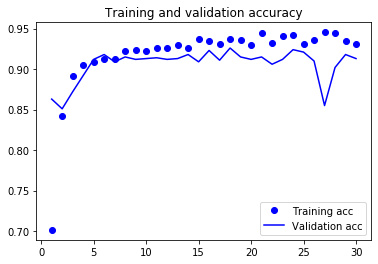

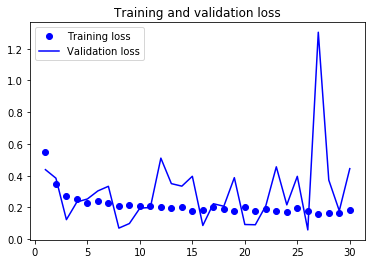

In [9]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [10]:
model.save("Malaria_detection1.h5")